# Lab 3 Draft Report: How Are Increasing Incarceration Rates Associated with Crime Rate?

Katie Mo, Errett Hobbs, and Ramiro Cadavid

## (1) Introduction

It's easy for candidates to support the idea of throwing criminals into prison to appear tough on crime; however, do available data support this position? Is incarceration associated with crime rate in North Carolina? If yes, then how so? To investigate these questions, we modeled crime rate ($crmrte$) as a function of the probability of getting arrested ($prbarr$), the probability of becoming convicted after arrest ($prbconv$), and the probability of becoming incarcerated upon conviction ($prbpris$). 

Incarceration is very costly; if it is not associated with lower crime rates, then the state of North Carolina should explore less expensive alternatives. On average, incarceration costs the state of North Carolina \\$36,219 per inmate per year, whereas prison alternatives like probation or parole supervision cost less than \$5,000 per year.<sup>1</sup> And the problem of high cost is only getting worse--the number of people imprisoned in America has increased from roughly 500,000 to over 2.2 million, more than four fold, between 1980 to 2015.<sup>2</sup>

Our analysis indicates that the likelihood of arrests and convictions are both associated with lower crime rate, while the likelihood of incarceration does not show any strong association. We have not established any causal relationships, but our findings suggest that North Carolina could launch pilot programs to test (i) if increasing arrest or conviction rates reduces crime and (ii) if offering alternatives to incarceration (e.g., probation, drug rehabilitation, fines) saves money without increasing crime rates.

## (2) Exploratory Data Analysis

### Data cleaning and univariate analysis

We analyzed a dataset of crime statistics in North Carolina where all the variables are from 1987, except for percent minority, from 1980. From the 97 rows in the dataset, six were empty and two were duplicated. probability of conviction contains a " \' " value which is likely a typing error. We removed duplicated and empty observations; in addition, we recast probability of conviction from a factor to a number. Consequently, **our final dataset contained 90 rows (counties) spread across 25 colums (variables)**.

In [1]:
# Import libraries and dataset
suppressMessages(library(stargazer)); suppressMessages(library(dplyr)); suppressMessages(library(corrplot))
suppressMessages(library(car)); suppressMessages(library(Hmisc)); suppressMessages(library(fBasics))
suppressMessages(library(lmtest)); suppressMessages(library(sandwich)); crime <- read.csv('crime_v2.csv')

In [2]:
# Show and remove empty cases
crime[!complete.cases(crime), ]
clean <- crime[complete.cases(crime), ]

# Show and remove duplicate counties
subset(clean, subset = clean$county == 193)
clean <- clean[!duplicated(clean$county), ]

# Remove ` and cast the column to numeric
clean$prbconv <- as.numeric(as.character(clean$prbconv))

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [3]:
# Summary statistics of all variables
basicStats(clean)[c(3, 5, 7, 8, 6, 4, 2), 1:13]
basicStats(clean)[c(3, 5, 7, 8, 6, 4, 2), 14:25]


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban
Minimum,1.0,87,0.005533,0.092770,0.068376,0.150000,5.380000,0.000746,0.000020,25.69287,0.000000,0.000000,0.000000
1. Quartile,51.5,87,0.020604,0.204948,0.344217,0.364216,7.375000,0.001238,0.547177,30.73462,0.000000,0.000000,0.000000
Mean,100.6,87,0.033510,0.295238,0.550861,0.410626,9.688889,0.001708,1.435670,38.16103,0.244444,0.377778,0.088889
Median,103.0,87,0.030002,0.271458,0.451698,0.422238,9.110000,0.001490,0.979245,34.91612,0.000000,0.000000,0.000000
3. Quartile,150.5,87,0.040249,0.344873,0.585130,0.457556,11.465000,0.001886,1.569261,41.01009,0.000000,1.000000,0.000000
Maximum,197.0,87,0.098966,1.090910,2.121210,0.600000,20.700001,0.009054,8.827652,119.76145,1.000000,1.000000,1.000000
NAs,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
Minimum,1.28365,193.6432,187.6173,154.2090,170.9402,133.0431,157.4100,326.1000,258.3300,239.1700,0.019608,0.062158
1. Quartile,10.02440,250.7544,374.3309,190.7096,285.5604,229.3385,288.5975,398.7850,329.2725,297.2275,0.080597,0.074368
Mean,25.71285,285.3532,410.9065,210.9214,321.6213,275.3379,336.0327,442.6189,357.7402,312.2801,0.129045,0.084026
Median,24.85155,281.1624,404.7800,202.9879,317.1257,253.1188,321.0500,448.8550,358.4000,307.6500,0.100950,0.077702
3. Quartile,38.18257,314.9793,440.6787,224.2824,342.6279,277.6500,359.8950,478.2550,383.1550,328.7750,0.152061,0.083518
Maximum,64.34820,436.7666,613.2261,354.6761,509.4655,2177.0681,646.8500,597.9500,499.5900,388.0900,0.465116,0.248712
NAs,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000


A deeper exploration of the variables available revealed possible errors and particular features in the distribution of these variables that should be taken into account in the model's specification to correctly represent the relationships of interest to the campaign.

#### Variables of interest

Throughout the exploratory analysis **we looked at both level and transformed forms of our variables of interest** (crime rate, probability of arrest, probability of conviction and probability of prison). However, throughout the presentations of this and the modeling phases, we will mostly focus on their log-transformed forms because these will be the form entered in the final model, for reasons that will be exposed throughout this report.

##### Crime rate

$crmrte$ values are within a reasonable range and there are no concentrations around specific values that would lead us to suspect measurement errors. Furthermore, the **log-transformation** doesn't increase the spread significantly, even for values that are close to zero, and results in a distribution that is **less skewed** than its original form; these, and the close relationship between the distribution of the errors and of the dependent variable, are some of the reasons to recommend including the log-transformed version of this variable in the final model.

,Min,Q1,Median,Mean,Q3,Max
crmrte,0.0055332,0.02060425,0.030002,0.03350992,0.04024925,0.0989659
log.crmrte,-5.1969890,-3.88261877,-3.506491,-3.54172735,-3.21301293,-2.3129800


[1] "Repeated values: 0"

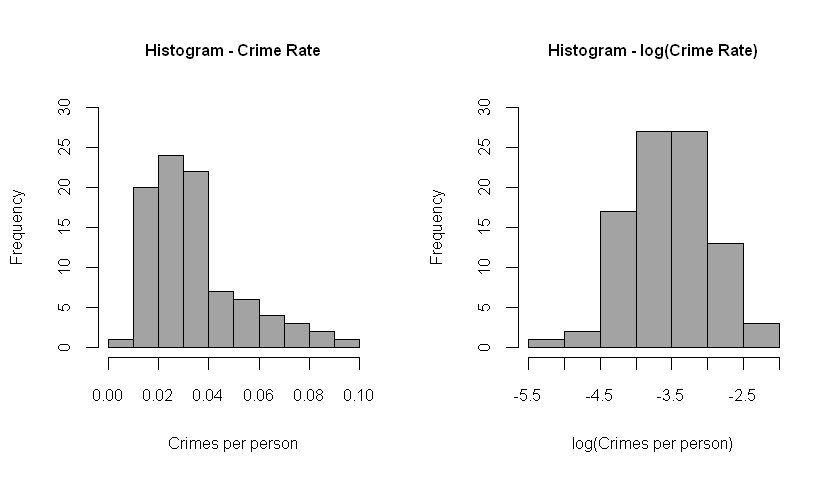

In [68]:
# Summary statistics of crime rate and log(crime rate)

summ.crmrte <- data.frame(t(data.frame(crmrte = matrix(unclass(summary(clean$crmrte))),
                             log.crmrte = matrix(unclass(summary(log(clean$crmrte)))))))
names(summ.crmrte) <- c("Min", "Q1", "Median", "Mean", "Q3", "Max"); summ.crmrte

# Check for concentration of observations around certain values

freqs.crmrte <- data.frame(table(clean$crmrte))
paste("Repeated values:", 
      length(freqs.crmrte$Freq[freqs.crmrte$Freq > 1]))

# Histograms of crime rate and log(crime rate)

par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
options(repr.plot.width=7, repr.plot.height=4)
hist(clean$crmrte, main = "Histogram - Crime Rate", col = rgb(0.4, 0.4, 0.4, 0.6), ylim = c(0, 30), xlab = "Crimes per person",
     breaks = sqrt(nrow(clean)))
hist(log(clean$crmrte), main = "Histogram - log(Crime Rate)", col = rgb(0.4, 0.4, 0.4, 0.6), ylim = c(0, 30), 
     xlab = "log(Crimes per person)", breaks = sqrt(nrow(clean)))

##### Probability of arrest

$prbarr$ has **one value larger than 1. This is atypical but we cannot be sure that it is an error** since we don't have enough information about how this variable is defined. For example, if $prbarr$ is defined as $(\text{arrests_in_period_t} / \text{crimes_in_period_t})$, values larger than 1 are possible since arrests in period t correspond both to crimes committed in period $t$ but also in $t-i, \forall i = 1, 2, ...$. The **log-transformation** is also within a reasonable range and returns a variable that is **less skewed**.

In [5]:
# Observations larger than 1
clean[clean$prbarr > 1, ]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,...,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495


,Min,Q1,Median,Mean,Q3,Max
Prbarr,0.092770,0.2049478,0.2714585,0.2952375,0.3448728,1.09090996
log.prbarr,-2.377632,-1.5850192,-1.3039478,-1.3043760,-1.0645829,0.08701217


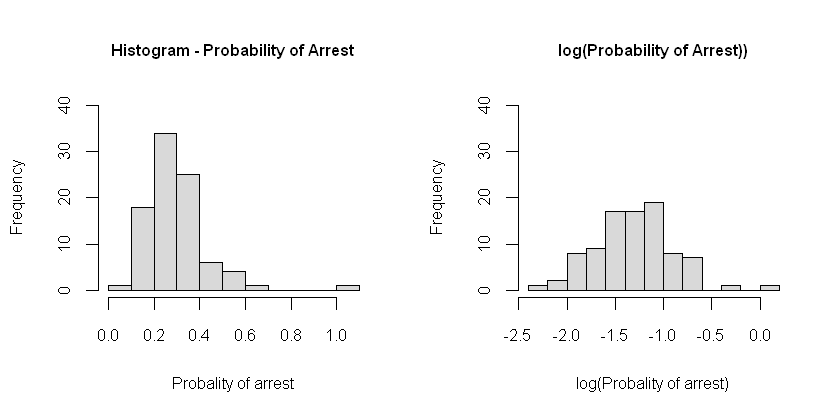

In [67]:
# Summary statistics of probability of arrest and log(probability of arrest)

summ.prbarr <- data.frame(t(data.frame(Prbarr = matrix(unclass(summary(clean$prbarr))),
                             log.prbarr = matrix(unclass(summary(log(clean$prbarr)))))))
names(summ.prbarr) <- c("Min", "Q1", "Median", "Mean", "Q3", "Max"); summ.prbarr

# Histograms of probability of arrest and log(probability of arrest)

par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
hist(clean$prbarr, main = "Histogram - Probability of Arrest", xlab = "Probality of arrest", 
     breaks = 10, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.3))
hist(log(clean$prbarr), main = "log(Probability of Arrest))", xlab = "log(Probality of arrest)", 
     breaks = 10, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.3))

##### Probability of conviction

**There are 10 observations with values larger than 1 and one of them with a value higher than 2**. Despite these values being unusually high they are possible for the same reasons exposed in the case of $prbarr$. Furthermore, in the case of $prbconv$, the lag between the arrest and the end of a trial could be even longer than the lag between crimmes and arrests. Therefore, since we don't have additional information on the definition used to build this variable and no way to validate which specific definition was used using numerical methods, **we will keep these 10 values**.

The **log-form** of this variable doesn't result in a noticeably larger spread and it is much momre symmetric than its original form. Then, it is a good **candidate to be included in the regression model**.

In [65]:
# Summary statistics of probability of convictions and log(probability of conviction)

summ.prbconv <- data.frame(t(data.frame(Prbconv = matrix(unclass(summary(clean$prbconv))),
                             log.prbconv = matrix(unclass(summary(log(clean$prbconv)))))))
names(summ.prbconv) <- c("Min", "Q1", "Median", "Mean", "Q3", "Max"); summ.prbconv

# Observations larger than 1

clean.ordered <- clean[order(clean$prbconv, decreasing = TRUE), ]
clean.ordered[clean.ordered$prbconv > 1, ]

,Min,Q1,Median,Mean,Q3,Max
Prbconv,0.0683761,0.3442172,0.4516985,0.5508611,0.5851303,2.1212101
log.prbconv,-2.6827319,-1.0665003,-0.7947435,-0.7555239,-0.5359822,0.7519867


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,mix,pctymle,log.crmrte,log.prbarr,log.prbconv,log.prbpris,density2,log.polpc,log.taxpc,square.density
84,185,87,0.0108703,0.195266,2.12121,0.442857,5.38,0.00122210,0.3887588,40.82454,...,0.04968944,0.07008217,-4.521721,-1.63339258,0.75198673,-0.8145084,0.1511334,-6.707185,3.709283,0.5398922
90,195,87,0.0313973,0.201397,1.67052,0.470588,13.02,0.00445923,1.7459893,53.66693,...,0.15612382,0.07945071,-3.461033,-1.60247718,0.51313492,-0.7537723,3.0484787,-5.412779,3.982797,4.7944680
51,115,87,0.0055332,1.090910,1.50000,0.500000,20.70,0.00905433,0.3858093,28.19310,...,0.10000000,0.07253495,-5.196989,0.08701217,0.40546511,-0.6931472,0.1488488,-4.704512,3.339077,0.5346581
2,3,87,0.0152532,0.132029,1.48148,0.450000,6.35,0.00074588,1.0463320,26.89208,...,0.03022670,0.08260694,-4.182966,-2.02473371,0.39304159,-0.7985077,1.0948107,-7.200946,3.291832,2.1411427
56,127,87,0.0291496,0.179616,1.35814,0.335616,15.99,0.00158289,1.3388889,32.02376,...,0.06305506,0.07400288,-3.535314,-1.71693402,0.30611611,-1.0917877,1.7926234,-6.448503,3.466478,3.1315123
44,99,87,0.0171865,0.153846,1.23438,0.556962,14.75,0.00185912,0.5478615,39.57348,...,0.01960784,0.12894706,-4.063631,-1.87180320,0.21056883,-0.5852582,0.3001522,-6.287652,3.678159,0.8480138
10,19,87,0.0221567,0.162860,1.22561,0.333333,10.34,0.00202425,0.5767442,61.15251,...,0.05334728,0.07713232,-3.809615,-1.81486431,0.20343869,-1.0986133,0.3326339,-6.202556,4.113371,0.9093781
91,197,87,0.0141928,0.207595,1.18293,0.360825,12.23,0.00118573,0.8898810,25.95258,...,0.06756757,0.07419893,-4.255020,-1.57216618,0.16799441,-1.0193622,0.7918881,-6.737397,3.256271,1.6817691
61,137,87,0.0126662,0.207143,1.06897,0.322581,6.18,0.00081426,0.3167155,44.29367,...,0.06870229,0.07098370,-4.368818,-1.57434593,0.06669554,-1.1314010,0.1003087,-7.113231,3.790842,0.4170243
67,149,87,0.0164987,0.271967,1.01538,0.227273,14.62,0.00151871,0.6092437,29.03402,...,0.11682243,0.06215772,-4.104474,-1.30207457,0.01526295,-1.4816033,0.3711779,-6.489894,3.368468,0.9804216


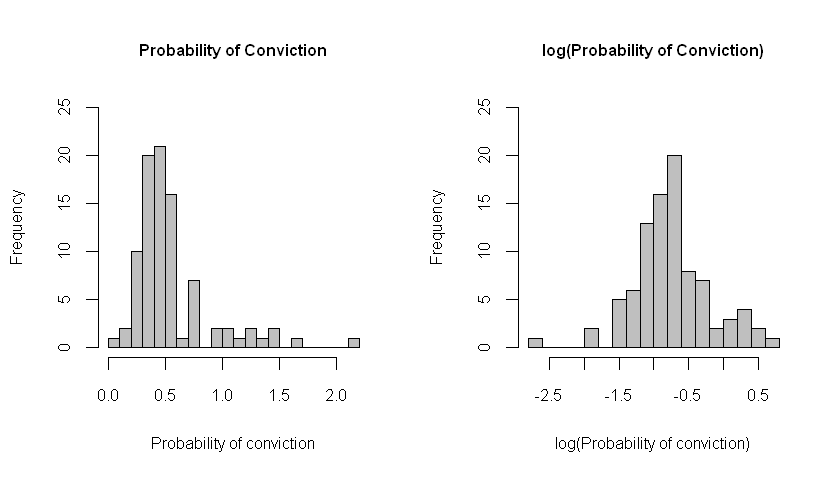

In [8]:
# Histograms of probability of conviction and log(probability of conviction)
par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
hist(clean$prbconv, main = "Probability of Conviction", xlab = "Probability of conviction",
     breaks = 15, ylim = c(0, 25), col = rgb(0.5, 0.5, 0.5, 0.5))
hist(log(clean$prbconv), main = "log(Probability of Conviction)", xlab = "log(Probability of conviction)",
     breaks = 15, ylim = c(0, 25), col = rgb(0.5, 0.5, 0.5, 0.5))

##### Probability of prison

$prbpris$ **spreads over a reasonable range and does not seem to have unusually high concentrations around certain values** that would lead us to suspect measurement errors. Furthermore, the distribution of this variable is symmetric both in its original and log-transformed forms. It is interesting that, unlike probability of arrest and conviction, this variable does not have values larger than -or close to- 1, which further supports our suspicion that the numerator and denominator of the proabilibity variables comprise different periods, given the relatively larger lag between the time a crime is commited and an arrest is made, for example, and the smaller lag between the time a conviction is made and the sentence is delivered, where misdemeanor cases are usually sentenced immediately and felony cases in days to weeks.

,Min,Q1,Median,Mean,Q3,Max
Prbpris,0.15000,0.3642162,0.4222380,0.4106256,0.4575557,0.6000000
log.prbpris,-1.89712,-1.0100113,-0.8621901,-0.9122331,-0.7818609,-0.5108256


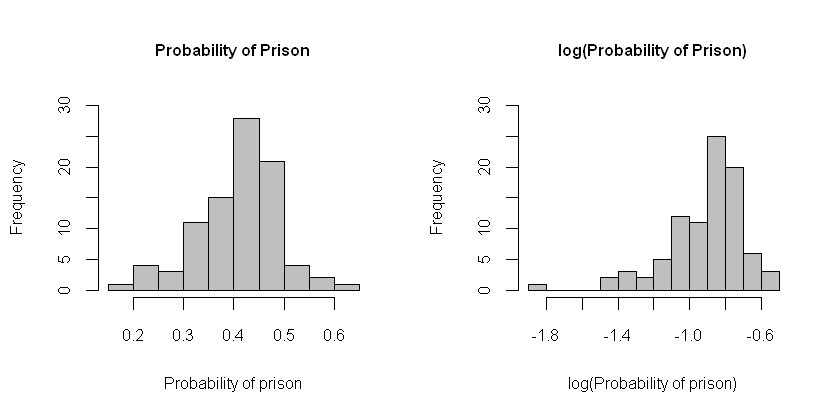

In [64]:
# Summary statistics of probability of prison and log(probability of prison)

summ.prbpris <- data.frame(t(data.frame(Prbpris = matrix(unclass(summary(clean$prbpris))),
                             log.prbpris = matrix(unclass(summary(log(clean$prbpris)))))))
names(summ.prbpris) <- c("Min", "Q1", "Median", "Mean", "Q3", "Max"); summ.prbpris

# Histograms of probability of prison and log(probability of prison)

par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
hist(clean$prbpris, main = "Probability of Prison", xlab = "Probability of prison",
     breaks = 15, ylim = c(0, 30), col = rgb(0.5, 0.5, 0.5, 0.5))
hist(log(clean$prbpris), main = "log(Probability of Prison)", xlab = "log(Probability of prison)",
     breaks = 15, ylim = c(0, 30), col = rgb(0.5, 0.5, 0.5, 0.5))

#### Other variables

In [10]:
basicStats(clean[,  c("density", "avgsen", "west", "central", "urban", "mix")])[c(2, 3, 5, 7, 8, 6, 4),]

,density,avgsen,west,central,urban,mix
NAs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minimum,0.000020,5.380000,0.000000,0.000000,0.000000,0.019608
1. Quartile,0.547177,7.375000,0.000000,0.000000,0.000000,0.080597
Mean,1.435670,9.688889,0.244444,0.377778,0.088889,0.129045
Median,0.979245,9.110000,0.000000,0.000000,0.000000,0.100950
3. Quartile,1.569261,11.465000,0.000000,1.000000,0.000000,0.152061
Maximum,8.827652,20.700001,1.000000,1.000000,1.000000,0.465116


Further exploration of the remaining variables, yielded the following findings that are important to take into account in the model building process.

- The **values of $density$ are unusually small**. Given that the density of North Carolina between 1980 and 1990 ranged from 120.9 to 136.4 [(US Census, 2018)](https://www.census.gov/population/www/censusdata/density.html) and that our sample contains 90% of counties, some of which are categorized as urban, a density of less than 1.6 for 75% of observations and a maximum density of 8.8 seems to be unusually low. It could be the case that this variable was rescaled; however, we cannot validate this using our dataset and this wouldn't have an impact in the $R^2$ or significance of the estimated coefficient. Then, we will not remove any observations.


- The **values of average sentence are also very small**, ranging from 5.3 to 20.7 days, with a mean of 9.7 days. This may indicate that the average is taken over all convictions, including those with no prison sentences, which is problematic for our purposes because (a) $avgsen$ will have a high collinearity with $prbpris$ and (b) the average sentence will be mainly driven by the no prison values and will not provide useful information on the sentences that result in prison. However, this is not necessarily evidence of measurement errors and we will not make any changes to this variable.


- The **definition of regional variables, $west$ and $central$ is ambiguous**. We are unclear as to how $west$ and $central$ are each defined; we also do not know if they are exhaustive of all counties and mutually exclusive, since there are observations with a value of 1 in both and neither of these variables. Given these ambiguities and the regional effects that $density$ may already capture, we will not include this variable in our subsequent analysis.


- **$urban$ is defined according to the standard metropolitan statistical area (SMSA) classification, wich is ambiguous** for our purposes, given that "such regions are neither legally incorporated as a city or town would be, nor are they legal administrative divisions like counties or separate entities such as states; because of this, the precise definition of any given metropolitan area can vary with the source" [Wikipedia](https://en.wikipedia.org/wiki/Metropolitan_statistical_area). Therefore, incorporating this variable into our model would not provide meaningful information. Furthermore, the effects captured by this variable are also likely captured by **$density$, which is a better candidate** to include in our model.


- **$mix$is also ambiguously defined** since it is not clear what face-to-face offences mean and it is also not clear how some of the plausible interpretations of this variable could be of interest to solve our research question.

Upon inspecting **other variables individually, we didn't find evidence of errors or other specially relevant features** that needed to be taken into account into the regression model. The values of these variables were within reasonable ranges, there were no missing values and there were not unusually high concentrations of observations around certain values. Therefore, all the other variables that were not mentioned will be out of the scope of our analysis.

### Bivariate analysis

Once we have finished exploring the variables in the dataset individually, and the main features that need to be taken into account for building the model that will help us answering the campaign's research question, we explored how the variables of interest relate to each other, mainly, how our variables of interest relate to $crmrte$ and to other predictors of $crmrte$ that may improve the model by reducing bias of the estimators and increasing their efficiency.

#### Variables of interest

An initial exploration of the relationship between $crmrte$ and $\log{crmrte}$ and our variables of interest (probability of arrest, probability of conviction, probability of prison and average sentence) indicates a **relationship that is similar for both crime rate and its logarithmic form**. Specifically, there seems to be a negative relationship with probability of arrest and probability of conviction but not a clear relationship with probability of prison. However, the scatter plot for the log transformed variables seems to show a more linear relationship than the scatterplot of the level variables.

To further explore the strength of the relationships hinted at by the scatterplots, we performed correlation analysis. Even though we **validated both the original and log-transformed** forms of our variables of interest, **we focus our presentation on the log transformed** form of these variables because these are the forms included in the regression model for the reasons exposed throughout this report (mainly because of interpretability, symmetry and compliance with the classic linear model assumptions).

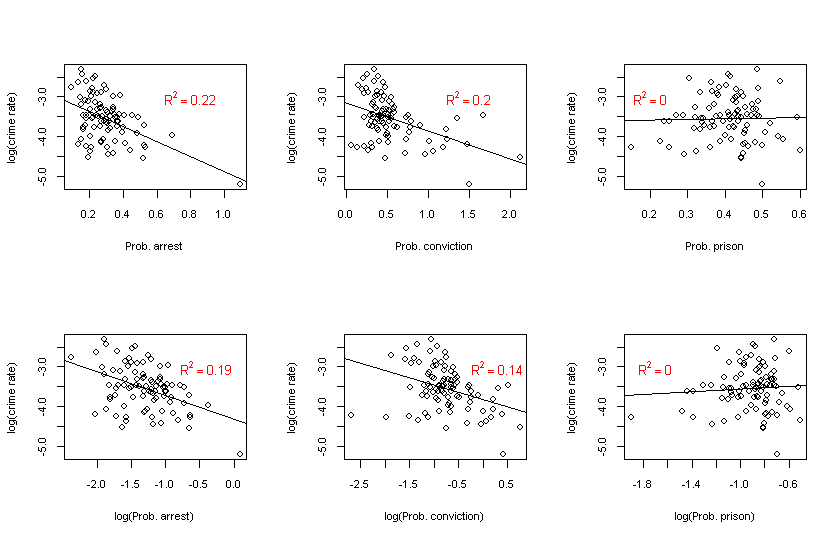

In [11]:
# Variables of interest

vars.interest <- c("log.crmrte", "log.prbarr", "log.prbconv","log.prbpris")

# Log transformations

clean$log.crmrte <- log(clean$crmrte)
clean$log.prbarr <- log(clean$prbarr)
clean$log.prbconv <- log(clean$prbconv)
clean$log.prbpris <- log(clean$prbpris)
clean$density2 <- clean$density^2
clean$log.polpc <- log(clean$polpc)
clean$log.taxpc <- log(clean$taxpc)

# We showed scatter plots for the log transformations in the EDA above; 
# here we are simply calculating R^2

# Generate bivariate regressions on untransformed regressors
model10 <- lm(log(crmrte) ~ prbarr, data=clean)
model11 <- lm(log(crmrte) ~ prbconv, data=clean)
model12 <- lm(log(crmrte) ~ prbpris, data=clean)

# Generate bivariate regressions on log-transformed regressors
model13 <- lm(log(crmrte) ~ log(prbarr), data=clean)
model14 <- lm(log(crmrte) ~ log(prbconv), data=clean)
model15 <- lm(log(crmrte) ~ log(prbpris), data=clean)

# Scatterplots and simple linear regression of variables of interest in level and log-form, vs log.crmrte

options(repr.plot.width=7, repr.plot.height=4.5)
par(mfrow = c(2, 3), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
plot(clean$prbarr, clean$log.crmrte, ylab = "log(crime rate)", xlab="Prob. arrest"); abline(model10)
rsq10 <- summary(model10)$r.squared; text(x = 0.8, y = -3, bquote(R^2 == .(round(rsq10, 2))), col = 'red')

plot(clean$prbconv, clean$log.crmrte, ylab = "log(crime rate)", xlab="Prob. conviction"); abline(model11)
rsq11 <- summary(model11)$r.squared; text(x = 1.5, y = -3, bquote(R^2 == .(round(rsq11, 2))), col = 'red')

plot(clean$prbpris, clean$log.crmrte, ylab = "log(crime rate)", xlab="Prob. prison"); abline(model12)
rsq12 <- summary(model12)$r.squared; text(x = 0.2, y = -3, bquote(R^2 == .(round(rsq12, 2))), col = 'red')

plot(clean$log.prbarr, clean$log.crmrte, ylab = "log(crime rate)", xlab="log(Prob. arrest)"); abline(model13)
rsq13 <- summary(model13)$r.squared; text(x = -0.4, y = -3, bquote(R^2 == .(round(rsq13, 2))), col = 'red')

plot(clean$log.prbconv, clean$log.crmrte, ylab = "log(crime rate)", xlab="log(Prob. conviction)"); abline(model14)
rsq14 <- summary(model14)$r.squared; text(x = 0.3, y = -3, bquote(R^2 == .(round(rsq14, 2))), col = 'red')

plot(clean$log.prbpris, clean$log.crmrte, ylab = "log(crime rate)", xlab="log(Prob. prison)"); abline(model15)
rsq15 <- summary(model15)$r.squared; text(x = -1.7, y = -3, bquote(R^2 == .(round(rsq15, 2))), col = 'red')

Analysis of correlations confirms that **probability of arrest and probability of conviction (both in their original and log-transformed forms) are negatively correlated with both crime rate and its logarithmic transformation**, and also confirms that there is no correlation between these two variables and probability of prison and average sentence. For all variables of interest (probability of arrest, probability of conviction and probability of arrest) **the linear relationship measured by the correlation coefficient is higher when $crmrte$ is log-transformed**. Therefore, we should test both forms of this variable when building our model taking this into account (but also how the two forms of this variable affect the interpretability of results and how they affect the model assumptions).

The log form of our independent variables of interest has a similar correlation correlation with $crmrte$ than their level form. However, it is still important to consider this transformation when defining our population model because they could improve the model's interpretability and assumptions.

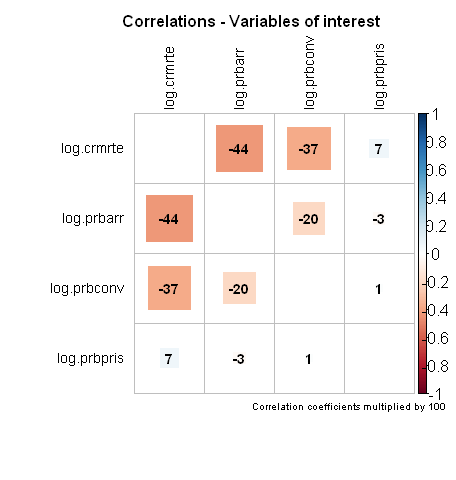

In [12]:
# Compute correlations

crime.corrs <- cor(select(clean, vars.interest))

# Plot correlations

options(repr.plot.width=3.8, repr.plot.height=4)
corrplot(crime.corrs, method = 'square',  order = 'original', diag = FALSE, addCoef.col = T, 
         tl.col = 'black', tl.cex = 0.7, addCoefasPercent = T, number.cex = 0.7)
title("Correlations - Variables of interest", cex.main = 0.8, line = 3)
suppressMessages(require(grid))
grid.text(label= "Correlation coefficients multiplied by 100" , x = unit(1,"npc") - unit(2, "mm"),
          y = unit(1.5, "cm"), just=c("right", "bottom"), gp=gpar(cex= 0.5))

#### Control variables

After exploring bivariate relationships between our variables of interest, our main objective is to find variables that either confound the effect of our independent variables of interest on $crmrte$ or that can increase the model's fit, reducing the variance of the model's error and of the coefficients of interest. To find which variables can be used as controls in our model, we did an initial exploratory analysis using a scatterplot matrix (not shown in this document due to space constraints) to find which of the candidate variables seemed to be related to $crmrte$ or its logarithmic transformation. 

Upon inspecting the scatterplot matrix, we found that **log of police per capita, tax per capita and density seem to have a clear relationship with $crmrte$ and its logarithmic transformations**. The correlation matrix included below shows that $\log{polpc}$, $density$, and $density^2$ are correlated with both $crmrte$ and its logarithmic transformation and thus should be included in our estimated model. Furthermore, density is both correlated with $crmrte$ and $\log{prbarr}$, which indicates that it may be a possible confounding variable and should also be included in our estimated model to reduce the bias of the estimator of the coefficient of $\log{prbarr}$.

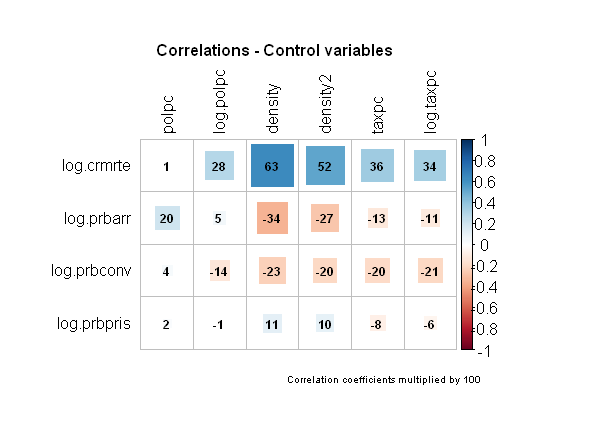

In [13]:
# Possible control variables

vars.control <- c('polpc', 'log.polpc', 'density', 'density2', 'taxpc', 'log.taxpc')

# Plot correlation coefficients

corrs.control <- cor(clean[, c(vars.interest, vars.control)], use = 'complete.obs')[1:4, 5:10]
options(repr.plot.width=5, repr.plot.height=3.7)
par(oma = c(0,0,0,4))
corrplot(corrs.control, method = 'square',  order = 'original', diag = T, addCoef.col = T,
         tl.col = 'black', tl.cex = 0.8, addCoefasPercent = T, number.cex = 0.6)
title("Correlations - Control variables", cex.main = 0.8)
grid.text(label= "Correlation coefficients multiplied by 100" , x = unit(10.2,"cm"), y= unit(1.3, "cm"),
          just=c("right", "bottom"), gp=gpar(cex= 0.5))

**In conclusion**, the main recommendations provided by the exploratory data analysis that should be taken into account when specifying the population model are the following:

- Both $crmrte$ and its logarithmic transformation should be tested as possible dependent variables.


- $prbarr$ and $prbconv$, two of our variables of interest, are correlated with both our candidate dependent variables and should be included in the regression model. Furthermore, their logarithmic transformation form is also correlated with the dependent variable and should be tested against their original form, using the resulting model's fit and meeting of the CLM asssumptions to decide which should be included in the specification of the population model.


- $prbpris$ does not seem to have a strong relationship with $crmrte$. However, this is a result that is relevant to the campaign's research question; thus, it should be included in the regression, in order to show this variable's statistical and practical significance and the implications of this result to the political campaign.


- From the candidate control variables, $\log{polpc}$, $density$, $density^2$ and $\log{taxpc}$ seem to have a relationship with $crmrte$ and its logarithmic form and should be considered in the model specification as controls. It is especially important to include $density$, since it is likely controlling for confounding effects.

## (3 and 4) Model Building and Regression Analysis

In [14]:
# Builds our base model
final_model1 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris), data=clean)
se.final_model1 <- sqrt(diag(vcovHC(final_model1)))


# Builds model 2
final_model2 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris) + density + I(density^2) + log(polpc), data=clean)
se.final_model2 <- sqrt(diag(vcovHC(final_model2)))


# Builds model 3
final_model3 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris) + density + I(density^2)
                   + log(polpc) + avgsen + taxpc + west + central + urban + pctmin80 + wcon + wtuc
                   + wfir + wser + wmfg + wfed + wsta + wloc + mix + pctymle, data=clean)
se.final_model3 <- sqrt(diag(vcovHC(final_model3)))

<table style="text-align:center"><caption><strong>Models</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">log(crmrte)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">log(prbarr)</td><td>-0.724<sup>***</sup></td><td>-0.475<sup>*</sup></td><td>-0.476<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.116)</td><td>(0.201)</td><td>(0.105)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">log(prbconv)</td><td>-0.472<sup>***</sup></td><td>-0.321</td><td>-0.258<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.138)</td><td>(0.169)</td><td>(0.131)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">log(prbpris)</td><td>0.148</td><td>0.043</td><td>-0.045</td></tr>
<tr><td style="text-align:left"></td><td>(0.242)</td><td>(0.232)</td><td>(0.171)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">density</td><td></td><td>0.305<sup>*</sup></td><td>0.362<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.130)</td><td>(0.141)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">I(density2)</td><td></td><td>-0.024</td><td>-0.031</td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.020)</td><td>(0.022)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">log(polpc)</td><td></td><td>0.176</td><td>0.214</td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.270)</td><td>(0.177)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">avgsen</td><td></td><td></td><td>-0.023</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.016)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">taxpc</td><td></td><td></td><td>0.007</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.008)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">west</td><td></td><td></td><td>-0.078</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.131)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">central</td><td></td><td></td><td>-0.101</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.086)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">urban</td><td></td><td></td><td>-0.190</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.202)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">pctmin80</td><td></td><td></td><td>0.012<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.003)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wcon</td><td></td><td></td><td>0.001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wtuc</td><td></td><td></td><td>0.0001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wfir</td><td></td><td></td><td>-0.001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wser</td><td></td><td></td><td>-0.0005</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.002)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wmfg</td><td></td><td></td><td>-0.0002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wfed</td><td></td><td></td><td>0.002<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wsta</td><td></td><td></td><td>-0.001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wloc</td><td></td><td></td><td>0.0002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.002)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">mix</td><td></td><td></td><td>-0.045</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.667)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">pctymle</td><td></td><td></td><td>1.939</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(2.375)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>-4.708<sup>***</sup></td><td>-3.563</td><td>-4.159<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.289)</td><td>(2.090)</td><td>(1.812)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>90</td><td>90</td><td>90</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.415</td><td>0.597</td><td>0.846</td></tr>
<tr><td style="text-align:left">Adjusted R<sup>2</sup></td><td>0.394</td><td>0.568</td><td>0.796</td></tr>
<tr><td style="text-align:left">Akaike Information Criterion (AIC)</td><td>108</td><td>80</td><td>26</td></tr>
<tr><td style="text-align:left">Residual Std. Error</td><td>0.427 (df = 86)</td><td>0.361 (df = 83)</td><td>0.248 (df = 67)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"><em>Note:</em></td><td colspan="3" style="text-align:right"><sup>*</sup>p &lt; 0.05; <sup>**</sup>p &lt; 0.01; <sup>***</sup>p &lt; 0.001</td></tr>
</table>

### Model 1: Our Base Model Measures the Elasticity of $crmrte$ with Respect to $prbarr$, $prbconv$, and $prbpris$

We wanted to understand if an increasing probability of incarceration for offenders ($prbpris$) is associated with lower crime rates ($crmrte$); however, to land in prison, offenders must first be arrested ($prbarr$) and convicted of a crime ($prbconv$). Our base model regresses our log-transformed outcome variable $crmrte$ on log transformations of $prbarr$, $prbconv$, and $prbpris$ to account for this natural sequence of events. The coefficients associated with each regressor capture how each regressor varies individually with $log(crmrte)$ when the other two are held constant.   

#### A Log-Log Model Is Easier to Interpret and Better Conforms to the CLM
Although the maximum value of $crmrte$ is only ~18 times greater than its minimum value, (0.0055 vs. 0.099), we discovered that regressions of  $\log{crmrte}$ on $prbarr$ or $prbconv$ individually had better fits $(prbarr: R^2 = 0.22$ and $prbconv: R^2 = 0.20)$ than regressions of $crmrte$ on $prbarr$ or $prbconv$ $(prbarr: R^2 = 0.15$ and $prbconv: R^2 = 0.16)$. Thus, we chose to employ $\log_{crmrte}$ in our base model. 

We also chose to log-transform all of our regressors (please see note below on why we did not choose to standardize our variables instead). Doing so sacrifices a slightly better fit as compared to modeling untransformed regressors $(R^2 = 0.45$ vs. $R^2 = 0.41)$, but also improves our model in three ways. 

**1) It makes our model easier to interpret.** Although they are presented as probabilities, some values of $prbarr$ and $prbconv$ exceed one; moreover, the maximum values of each are different. Additionally, scaling issues hinder comparisons between counties; for example, what does it mean to make a 0.1-unit change in a county with $prbconv=0.1$ as compared to one with $prbconv=0.5$?  Employing a log-log model circumvents these complications and lets us compare the elasticity of $crmrte$ with respect to each of our key variables.  

**2) It better fits the zero-mean assumption of the CLM.** The log-level model of $crmrte$ against our regressors has a fitted values vs. residuals plot that noticeably bows upward at either end (data not shown). The log-log model is flat on the left and bows upward much less on the right. 

**3) It lowers the maximum Cook's distance to below 0.5.** County #51 greatly influences the log-level model (Cook's distance $\geq$ 1); the log-log model increases the influence of other points, but in no case to a Cook's distance of more than 0.5. 

Having fully specified our base model, we calculated the least-squares fit below. 

$$ \widehat{\log{crmrte}} = -4.71 - 0.724*\log prbarr - 0.472*\log prbconv + 0.148*\log prbpris $$


**Note:** _We also considered creating a log-level model after standardizing each regressor by subtracting its mean and dividing by its standard deviation. However, this model still suffers from the same problems as employing the original, unscaled, untransformed regressors. Furthermore, we felt that our political clients would better understand percent changes as opposed to changes described as standard deviations._  

#### Model 1 Violates CLM Assumptions of Zero Conditional Mean, Heteroskedasticity,  Normality, and (Possibly) Random Sampling, but Likely Satisfies Conditions for Exogeneity and Asymptotic Normality

In order to infer appropriate conclusions from our model, we evaluated if the model meets the six classical linear model assumptions.

*1. Linear in parameters*: Although we have utilized log transformations in the variables, our base population model is employed as

$$\log{y} = \beta_0 + \beta_1 \log{x_1} + \beta_2 \log{x_2} + \beta_3 \log{x_3} + u$$

Because the parameters $\beta_0$ through $\beta_3$ are linear with respect to $\log{y}$, our model meets the linear in parameters assumption.

*2. Random sampling*: With some research, we found that there are a total of 100 counties in North Carolina, however our data set only includes 90 observations. Because of the limited information on how the data was collected, we cannot conclude whether or not we have met the random sampling assumption. There could be a number of reasons why these counties were missing- it could be because the counties did not have the resources to collect this type of information (which could indicate fewer resources for law enforcement) or simply did not want to share them (possibly due to shame of high crime rate). In these scenarios, the data set would be missing full representation of the entire population of North Carolina counties.

*3. No perfect collinearity*: Because the model was able to successfully regress, we can confirm that our model does not have perfect collinearity. However, we still want to ensure that we don't have imperfect collinearity in our model. We calculated the variance inflation factor (VIF) for each explanatory variable. The VIF values were all much less than 10, indicating that our model does not have the collinearity that could increase the estimator's variance. 

In [15]:
paste("VIF for explanatory variables:")
vif(final_model1)

[1] "VIF for explanatory variables:"

log(prbarr) log(prbconv) log(prbpris) 
    1.043425     1.042722     1.000810

*4. Zero conditional mean*: To satisfy the zero conditional mean assumption, the error $u$ should have an expected value of zero given any values of the explanatory variables. To evaluate this, we used the residuals as an estimate of the error and looked at the residuals vs fitted values plot. The red spline estimates the mean of the residuals across the fitted values and a flat line at 0 would indicate a zero conditional mean. Using log transformations of the explanatory variables did help flatten the mean line compared with a model without these transformations. However, our plot for model 1 still shows some curvature towards the right side of the plot, as shown in graph (a) below. This indicates that our estimators are biased.

[1] "Model 1 diagnostic plots:"

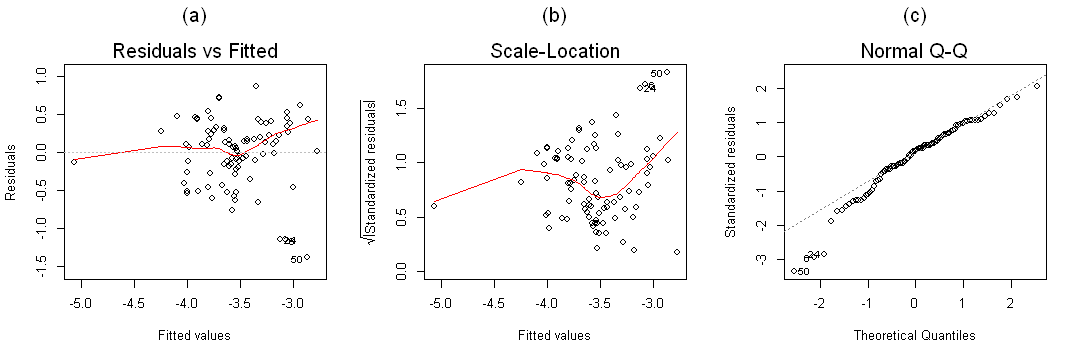

In [16]:
options(repr.plot.width=9, repr.plot.height=3)
paste("Model 1 diagnostic plots:")
par(mfrow=c(1,3))
plot(final_model1, which = 1); mtext("(a)", side = 3, padj = -2.5)
plot(final_model1, which = 3); mtext("(b)", side = 3, padj = -2.5)
plot(final_model1, which = 2); mtext("(c)", side = 3, padj = -2.5)

However, we are still able to argue that model 1 meets the weaker exogeneity assumption. Because we have a large enough sample size, and our transformed explanatory variables, $\log \ prbarr$, $\log \ prbconv$, and $\log \ probpris$ do not have extreme skew as shown in our univariate analysis, the bias in our estimators may be able to converge in probability to zero or at least close to zero. Furthermore, our discussion of omitted variables later in this report concludes that these biases are in the direction that keeps our estimates conservative.

*5. Homoskedasticity*: In graph (a), we see that the variances in the data increases with an increasing fitted value, as the band around the red spline grows bigger. This indicates that our model does have some degree of heterskedasticity. Graph (b) shown above supports this conclusion, as the red spline curve estimating the mean of the square root of the absolute value of the residuals is not a straight flat line. Furthermore, because we have a moderately sized data set, we can also use the Breusch-Pagan test. The results show a significant p-value, so we reject the null hypothesis that there is homoskedasticity. Because of this, and also because it is best practice, we will use the heterskedastic robust standard errors when determining statistical significance of the estimators.

In [17]:
bptest(final_model1)


	studentized Breusch-Pagan test

data:  final_model1
BP = 10.047, df = 3, p-value = 0.01817


*6. Normality of errors*: Graph (c) above shows that the residuals is somewhat close to normal distribution, but ultimately deviates from normal distribution with a left skew as indicated by the data points veering away from the dotted line. Again, because we have a moderately sized data set, we can use the Shapiro-Wilk  test. The p-value from the test is significant, so we reject the null hypothesis that there is normality. However, looking at the histogram of the residuals show that there is not extreme skewness, and with a data set with 90 observations, we are able to use the central limit thereom to argue that the estimators satistify asympototic normality.

In [18]:
shapiro.test(final_model1$residuals)


	Shapiro-Wilk normality test

data:  final_model1$residuals
W = 0.96047, p-value = 0.007851


#### $prbpris$ Is Not Associated with Crime Rate in Any Practical Way, but $prbarr$ and $prbconv$ Are Negatively Associated

$\hat{\beta}_{\log{prbarr}}$, $\hat{\beta}_{\log{prbconv}}$, and $\hat{\beta}_0$ are statistically significant at the 0.1% level, but $\hat{\beta}_{\log{prbarr}}$ is not, even at the 25% level; thus, our model suggests that changes in incarceration rates are not associated with changes in crime rate. Our model further suggests that 10% relative increases (not absolute increases) in $prbarr$ and $prbconv$ are associated with 7.24% and 4.72% relative reductions in $crmrte$ when the other two regressors are held fixed. Although it is statistically significant at the 0.1% level, $\hat{\beta}_0$ indicates the $\log{crmrte}$ intercept when $prbarr=prbconv=prbpris=1$. This only occurs when authorities make arrests for all reported offenses, convict everyone who is arrested, and incarcerate all convicts. Clearly, this is not a realistic situation across an entire county.

We speculate that $\hat{\beta}_{\log{prbarr}}$ and $\hat{\beta}_{\log{prbconv}}$ describe practically significant associations with crime rate, since comparatively large reductions in crime rate are associated with modest increases in arrest and conviction rates. In contrast, the probability of being incarcerated upon conviction does not appear to be associated with crime rate at any statistically significant level; thus to a first approximation, the answer to our research question is no. 

We cannot claim that these relationships indicate causality; however, they suggest that we should introduce additional regressors to isolate the associations of $\log{crmrte}$ with $\log{prbarr}$ and $\log{prbconv}$. Doing so could provide support for launching controlled pilot programs that are aimed at increasing arrest and conviction rates and would be able to test if any causal relationships exist. Additionally, since we observe that $\log{prbpris}$ is not associated with $\log{crmrte}$, North Carolina should also explore if less costly alternatives to incarceration do not affect crime rate.

### Model 2: Adding $density$ and $polpc$ Controls for Confounding Effects and Improves Our Base Model's Fit

Having established our base model, we sought to introduce covariates that might (i) control for confounding effects and (ii) parsimoniously improve the model's fit to the underlying data . 

Given that we observed $\log{prbarr}$ is negatively associated with $\log{crmrte}$, we speculated that reduced crime rates might be associated just with having a higher concentration of police officers relative to population size as opposed to the act of arresting people itself. We sought to address this issue by including $\log{polpc}$ as a regressor to partial out the effect of police presence per capita from $prbarr$ (as well as the other variables in our base model). 

Counties in North Carolina are spread across a wide (29-fold) range of population densities. [This excludes the extreme outlier county 173 ($density = 0.000020$), which we retained in the dataset, but disregarded in calculating the illustrative range here.] We speculate that counties with relatively high densities could experience different challenges than counties with low densities; for instance, because of disparities in unemployment, educational attainment, or opportunities to commit crime. In fact, we observed that $density$ has a strong correlation with $\log{crmrte}$ and a strong negative correlation with both $\log{prbarr}$ and $\log{prbconv}$. Thus, we included it to reduce bias it might otherwise impart to $\hat{\beta}_{\log{prbarr}}$ and $\hat{\beta}_{\log{prbconv}}$. 


#### We Added a Quadratic Term to $density$ and Log-Transformed $polpc$ to Improve Our Model's Fit

We incorporated $\log{polpc}$ as well as $density$ and $density^2$ as regressors. We previously identified county #51 as an outlier with respect to $prbarr$ and $prbconv$, it also is an outlier with respect to $polpc$. (Although it represents a single data point, we note that it also has the lowest crime rate in the dataset.) Log-transforming $polpc$ ameliorates the influence that county #51 has on a regression with $\log{crmrte}$. It also yields a better fitting regression relative to the untransformed variable ($R^2 = 0.08$ vs. $R^2=0$) that has a lower Akaike Information Criterion (AIC) score (145 vs. 152). Both $density$ (and $density^2$) show a great degree of positive skew. A scatter plot indicates that $density$ is positively associated with $\log{crmrte}$, but at $density \geq 2$ the strength of this association starts to lessen. We added a quadratic term to account for this, which yielded a better fit than regressing against $density$ by itself ($R^2 = 0.46$ vs. $R^2 = 0.40$) and a better AIC score (100 vs. 106).  

Having fully specified our second model, we calculated the least-squares fit below.

$$ \widehat{\log crmrte} = -3.563 - 0.475*\log prbarr - 0.321*\log prbconv + 0.043*\log prbpris + 0.305*density - 0.024*density^2 + 0.176*\log polpc$$

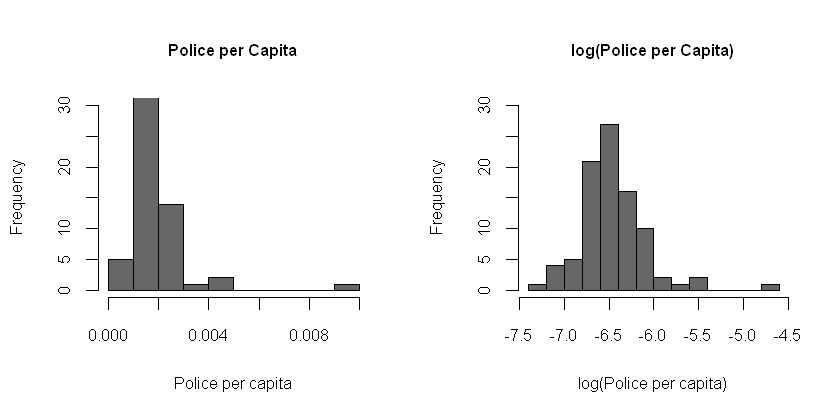

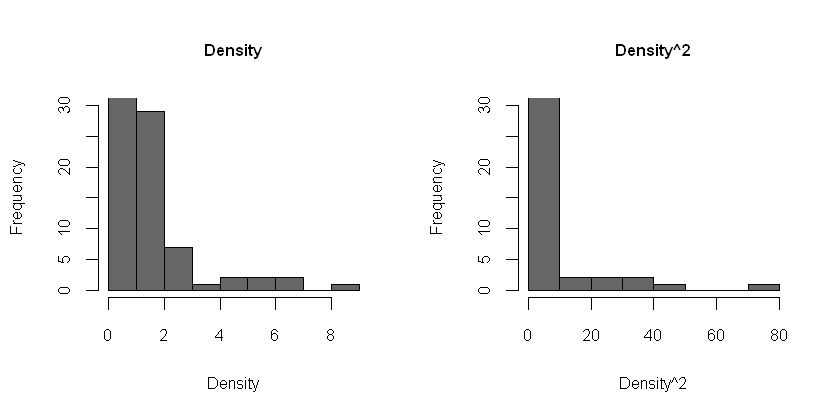

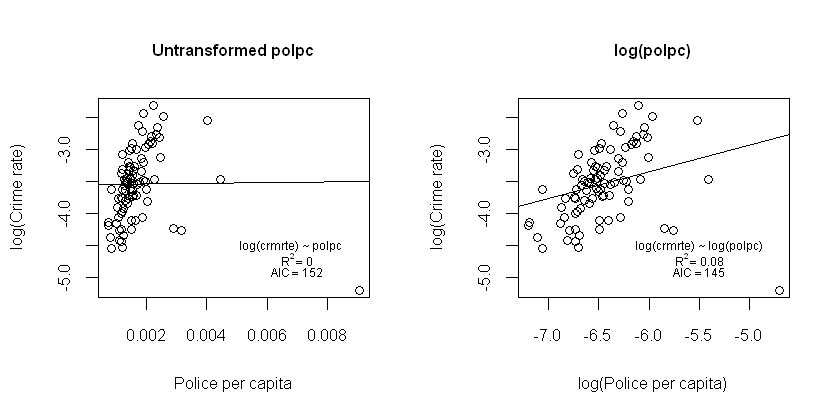

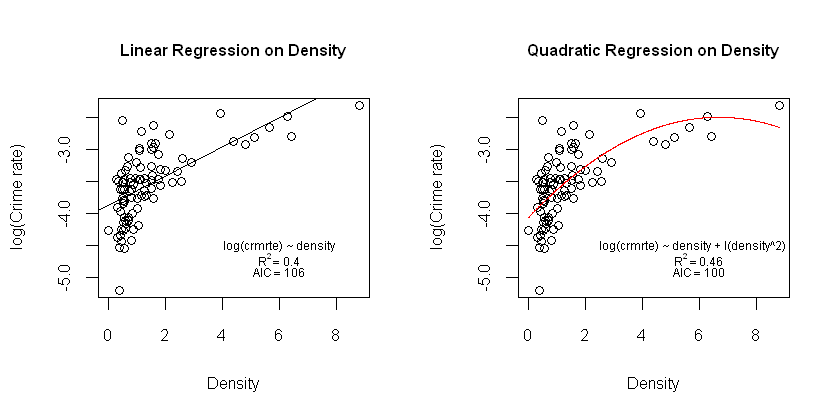

In [70]:
# Values of polpc and log(polpc) are relatively concentrated 

options(warn=-1)
par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
options(repr.plot.width=7, repr.plot.height=3.5)
hist(clean$polpc, main = "Police per Capita", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), xlab = "Police per capita",
     breaks = sqrt(nrow(clean)))
hist(log(clean$polpc), main = "log(Police per Capita)", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), 
     xlab = "log(Police per capita)", breaks = sqrt(nrow(clean)))

# density and density^2 exhibit a great degree of positive skew 

options(warn=-1)
par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
# options(repr.plot.width=6, repr.plot.height=4)
hist(clean$density, main = "Density", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), xlab = "Density",
     breaks = sqrt(nrow(clean)))
hist((clean$density)^2, main = "Density^2", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), 
     xlab = "Density^2", breaks = sqrt(nrow(clean)))

# Plots regression lines for polpc models

# log(crmrte) ~ polpc
model.p1 <- lm(log(crmrte) ~ polpc, data=clean)
plot(clean$polpc, log(clean$crmrte), main="Untransformed polpc", 
     xlab="Police per capita", ylab="log(Crime rate)")
abline(model.p1)
text(0.0068, -4.5, paste(summary(model.p1)$call[2]), cex = 0.6)
rsq.p1 <- summary(model.p1)$r.squared; text(x = 0.007, y = -4.7, bquote(R^2 == .(round(rsq.p1, 2))), cex = 0.6)
text(0.007, -4.9, bquote(AIC == .(round(AIC(model.p1), 0))), cex = 0.6)

# log(crmrte) ~ log(polpc)
model.p2 <- lm(log(crmrte) ~ log(polpc), data=clean)
plot(log(clean$polpc), log(clean$crmrte), main="log(polpc)", 
     xlab="log(Police per capita)", ylab="log(Crime rate)")
abline(model.p2)
text(-5.5, -4.5, paste(summary(model.p2)$call[2]), cex = 0.6)
rsq.p2 <- summary(model.p2)$r.squared; text(x = -5.5, y = -4.7, bquote(R^2 == .(round(rsq.p2, 2))), cex = 0.6)
text(-5.5, -4.9, bquote(AIC == .(round(AIC(model.p2), 0))), cex = 0.6)


# Plot density regressions against data

clean$square.density <- (clean$density + (clean$density)^2)

# log(crmrte) ~ density
model.d1 <- lm(log(crmrte) ~ density, data=clean)
model.d2 <- lm(log(crmrte) ~ density + I(density^2), data=clean)
clean$square.density <- (clean$density + (clean$density)^2)
newdata <- data.frame(density=seq(min(clean$density), max(clean$density), 0.01))
newdata <- data.frame(density=seq(min(clean$density), max(clean$density), 0.01))
newdata$pred1 <- predict(model.d2, newdata)
plot(clean$log.crmrte ~ clean$density , data=newdata, main="Linear Regression on Density",  
     xlab="Density", ylab="log(Crime rate)")
abline(a=coef(model.d1)[1], b=coef(model.d1)[2])
text(6, -4.5, paste(summary(model.d1)$call[2]), cex = 0.6)
rsq.d1 <- summary(model.d1)$r.squared; text(x = 6, y = -4.7, bquote(R^2 == .(round(rsq.d1, 2))), cex = 0.6)
text(6, -4.9, bquote(AIC == .(round(AIC(model.d1), 0))), cex = 0.6)

# log(crmrte) ~ density + density^2
plot(clean$log.crmrte ~ clean$density , data=newdata, main="Quadratic Regression on Density", 
     xlab="Density", ylab="log(Crime rate)")
lines(newdata$density, newdata$pred1, col="red")
text(5.8, -4.5, paste(summary(model.d2)$call[2]), cex = 0.6)
rsq.d2 <- summary(model.d2)$r.squared; text(x = 6, y = -4.7, bquote(R^2 == .(round(rsq.d2, 2))), cex = 0.6)
text(6, -4.9, bquote(AIC == .(round(AIC(model.d2), 0))), cex = 0.6)

#### County 115 Is a Promient Outlier and Has High Leverage on Model 2

Analyzing the residuals versus leverage plot showed that model 2 has one point with high leverage, exceeding a Cook's distance of 1. The data point corresponds to county 115 (row index 51), which is a prominent outlier as it is the county with $prbarr$ greater than 1, one of the counties with $prbconv$ greater than 1, and has the lowest crime rate. Although we do not have any reason to remove the outlier, as we had discussed in the univariate analysis, further investigation into this county's criminal justice system and how it reported its metrics may be useful in revealing insights on why this county's crime rate is notably low.

#### Model 2 Violates CLM Assumptions of Heteroskedasticity, Normality, and (Possibly) Random Sampling, but Satisfies Conditions for Asymptotic Normality

1. *Linear in parameters:* Our equation for model 2 meets the linearity in parameters assumption as the parameters $\beta_j$ are linear.
* *Random sampling:* We use the same dataset as in model 1, so our rationale that the data may or may not have random sampling is the same.
* *No perfect collinearity:* There is no perfect collinearity, however the variance inflation factors for $density$ and $density^2$ were calculated to be high. This does not alarm us as these represent a quadratic transformation and does not indicate collinearity with a different explanatory variable.
* *Zero conditional mean:* The red spline curve in graph (d) is fairly flat in the center, while curving downwards on the left side of the graph. This could be because there is less data points on the left, with the left most point causing the downward curvature. Because the line is reasonably flat for the majority of the data points, we believe that model 2 may be able to the zero conditional mean assumption, although imperfectly.
* *Homoskedasticity:* The red spline curve in graph (e) shows that there is a fair amount of heterskedasticity, however this pronouced curvature may be due to having less data points on the left side of the graph. The Breusch-Pagan test also indicates that there is heterskedasticity. Nevertheless, we continue to use heterskedastic robust standard errors.
* *Normality of errors:* The points on graph (f) do deviate from a normal distribution towards the edges, but because there is no extreme skewness and a large number of observations, we are still able to rely on the central limit theorem.

In [ ]:
options(repr.plot.width=9, repr.plot.height=3)
paste("Model 2 diagnostic plots:")
par(mfrow=c(1,3))
plot(final_model2, which = 1); mtext("(d)", side = 3, padj = -2.5)
plot(final_model2, which = 3); mtext("(e)", side = 3, padj = -2.5)
plot(final_model2, which = 2); mtext("(f)", side = 3, padj = -2.5)

#### $\log{prbarr}$ and $\log{prbconv}$ Still Show Practically Significant Associations with Crime Rate After Accounting for Population Density and Police per Capita

Relative to our base model ($R^2=0.415$ and $AIC=108$), model 2 yields a better fit ($R^2=0.597$) and minimizes information loss ($AIC=80$). The coefficients for our key variables are at least somewhat biased in our base model, since model 2 drives their magnitudes closer to zero. Specifically, $|\hat{\beta}_{\log{prbarr}}|$ and $|\hat{\beta}_{\log{prbconv}}|$ are reduced by 34% and 32%, respectively. Furthermore, the statistical significance of each coefficient is reduced; $\hat{\beta}_{\log{prbarr}}$ is only significant at the 5% level, while $\hat{\beta}_{\log{prbconv}}$ is only significant at the 10% level, which could indicate that they are each colinear with some combination of $\log{polpc}$, $density$, or $density^2$. $|\hat{\beta}_{\log{prbpris}}|$ dropped closer to zero and still is not statistically significant. $\hat{\beta}_0$ is no longer statistically significant.

We speculate that $\hat{\beta}_{\log{prbarr}}$ and $\hat{\beta}_{\log{prbconv}}$ are still probably of practical significance and indicate more actionable associations with crime rate than $\hat{\beta}_{\log{prbpris}}$. Even after accounting for differences in $density$ and $polpc$, modest percentage increases in either variable are still associated with relatively substantial percentage reductions in crime rate (e.g., a 10% increase in $prbarr$ from its original level is associated with a 4.75% reduction in $crmrte$ from its previous level). Additionally, $\hat{\beta}_{\log{prbconv}}$ just misses the threshold of being statistically significant at the 5% level ($\text{p-value}=0.59$). Conversely, $\hat{\beta}_{\log{prbpris}}$ still is not statistically significant and the magnitude of its effect even is smaller in this model, which argues that it is still not practically significant. 

In total, having controlled for the effects of police presence and population density, we find that arrest and conviction rates are still meaningfully associated with crime rate, but no association with incarceration. These results strengthen the notion that there is value in launching pilot programs (i) to test if North Carolina can increase arrests or convictions to reduce crime rates and (ii) to test if it can offer more economical sentences to some offenders in lieu of prison without increasing crime rate. 

#### $\hat{\beta}_{density}$ Is Statistically Significant and Both $density$ Terms Describe Our Data Well

$\hat{\beta}_{density}$ is statistically significant at the 5% level, while $\hat{\beta}_{density^2}$ is not. The two $density$ terms indicate that $\widehat{\log{crmrte}}$ rises in association with $density$ up until $density \approx 6.5$, which fits our data well, given that only three counties have $density > 6$. $\hat{\beta}_{\log{polpc}}$ is not statistically significant; thus, we do not consider its practical significance.

### Model 3: $\hat{\beta}_{\log{prbarr}}$ and (to a Lesser Extent) $\hat{\beta}_{\log{prbconv}}$ Exhibit Robustness to Model Specification, but $\hat{\beta}_{\log{prbpris}}$ Does Not

Finally, we tested the robustness of our base model coefficients to pertubations in model specification. To do so, we added untransformed regressors that correspond to every variable remaining in the dataset that we did not specifically address in model 2, with the exception of $year$ and $county$ (see regression table above).

#### County 185 Is a Promient Outlier and Has High Leverage on Model 3

Analyzing the residuals versus leverage plot showed that model 3 has one point with high leverage, exceeding a Cook's distance of 1. The data point corresponds to county 185 (row index 84), which is a prominent outlier as it is the county with largest $probconv$, the one that was greater than 2, and has the third lowest crime rate. Although we do not have any reason to remove the outlier, further investigation into this county's criminal justice system may be useful in revealing any insights on why this county's crime rate is also quite low.

#### Model 3 Violates CLM Assumptions of Normality and (Possibly) Random Sampling, but Satisfies Conditions for Asymptotic Normality

1. *Linear in parameters:* Our equation for model 3 meets the linearity in parameters assumption as the parameters $\beta_j$ are linear.
* *Random sampling:* We use the same dataset as in model 1 and 2, so our rationale that the data may or may not have random sampling is the same.
* *No perfect collinearity:* There is no perfect collinearity and the variance inflation factor for all explanatory variables is less than 10, besides $density$ and $density^2$ as discussed previously.
* *Zero conditional mean:* The red spline curves in graph (g) is quite flat and approximately meets the zero conditional mean assumption. If we have true random sampling, the estimators for model 3 are unbiased.
* *Homoskedasticity:* The red spline curve in graph (h) is fairly flat, though does not look perfectly flat. Using the Breusch-Pagan test, we fail to reject the null hypothesis that there is homoskedasticity. Although we may be able to say that the model is homoskedastic, we will again continue to use heterskedastic robust standard errors as it is best practice.
* *Normality of errors:* There is a small left skew, as shown in graph (i), however we are still able to use the central limit theorem as there is no extreme skewness.

In [ ]:
paste("Model 3 diagnostic plots:")
par(mfrow=c(1,3))
plot(final_model3, which = 1); mtext("(g)", side = 3, padj = -2.5)
plot(final_model3, which = 3); mtext("(h)", side = 3, padj = -2.5)
plot(final_model3, which = 2); mtext("(i)", side = 3, padj = -2.5)

#### Model 3 Reinforces the Notion that the Probability of Incarceration Is Not Associated with Crime Rate, but Probabilities of Arrest and Conviction Are

With respect to our motivating question (i.e., Is incarceration associated with crime rate?), comparatively larger reductions in crime are associated with simply arresting suspects and convicting offenders; incarceration, which is more costly, is not associated with higher or lower crime rates. In model 2, we controlled for bias that police presence ($polpc$) and population density ($density$) could impart to the coefficients for our key variables ($\hat{\beta}_{\log{prbarr}}$, $\hat{\beta}_{\log{prbconv}}$, and $\hat{\beta}_{\log{prbpris}}$). The fact that the values of $\hat{\beta}_{\log{prbarr}}$ and $\hat{\beta}_{\log{prbconv}}$ remain relatively unchanged in model 3 compared to model 2 suggests they are robust to model specification. The magnitude of each changes is greater in comparing model 3 to model 1 (but still no more than 50%)); additionally, model 1 violates the zero conditional mean assumption, so it is unsurprising that they are more biased in this case. In contrast, $\hat{\beta}_{\log{prbpris}}$ changes drastically between all three models and appears to be sensitive to model specification.

* $\log{prbarr}$: We argued above in model 2 that $\hat{\beta}_{\log{prbarr}}$ is of practical significance; this conclusion also holds in model 3, since $\hat{\beta}_{\log{prbarr}}$ is of even greater statistical significance and has the same value. 


* $\log{prbconv}$: $\hat{\beta}_{\log{prbconv}}$ is statistically significant in model 3, but its effect is slightly smaller in model 3 (-0.258) than it is in model 2 (-0.321). We argue that this could still represent a practically significant effect, as it implies that a 10% relative increase in convictions is associated with a 2.58% relative reduction in crime rate. 


* $\log{prbpris}$: As before, $\hat{\beta}_{\log{prbpris}}$ is not statistically significant, and its value is even closer to zero. These two observations suggest that the probability of incarceration is not associated with crime rate in any meaningful way (i.e., the answer to our research question is no).

#### $pctmin80$, $density$, and $wfed$ Are Statistically Significant to at Least the 5% Level

* **$pctmin80$:** Holding all other regressors constant, a one unit increase in $pctmin80$ is associated with a 1.2% increase in $crmrte$; given that the median of $pctmin80$ is 24, this represents a substantial increase in $crmrte$. Thus, researchers may need to control for $pctmin80$ if other factors do not absorb its effects, but is of limited use in recommending specific policies. Efforts to alter this quantity (e.g., by evicting minorities) are likely unrealistic to undertake, morally repugnant, and legally dubious.


* **$density$:** We previously accounted for $density$ in model 2. Compared to model 2, model 3 captures a slightly steeper rise in $crmrte$ as a function of population density. As with $pctmin80$, researchers may need to control for $density$ if other factors do not absorb its effects, but it is of limited use in the sense that we cannot reasonably recommend policies that test if reducing population density reduces crime in existing areas. However, in the long term, North Carolina might be able to test if changing zoning laws to reduce population density lowers crime rate in new communities.


* **$wfed$:** Holding all other regressors constant, every dollar that federal employees earn on a weekly basis is associated with a 0.2% increase in $crmrte$; given that the median of $wfed$ is \\$449.8, this represents a substantial increase in $crmrte$. Thus, researchers may need to control for $pctmin80$ if other factors do not absorb its effects; however, we suspect that it is of limited use in recommending specific policies. For example, an increasing federal wage could simply represent greater federal investment in an area (e.g., to decrease poverty or perhaps even crime rate).

## (5) Omitted Variable Bias

There are many reasons why a person might commit a crime. It could be because that person cannot find a job but still needs to provide for his/her family, has a drug addiction or mental instability, or did not have a good role model growing up. Though it can be difficult to pinpoint the underlying motivation, there are several factors that are not included in the dataset that could influence the inclination of committing a crime and bias our results. 

We will discuss some of the omitted variables and how it might over or underestimate the relationships between probability of arrest and conviction with crime rate. To do this, we first write the equation for our base model with the omitted variable $omitvar$, as denoted below:

$$
crmrte = \beta_0 + \beta_1 prbarr + \beta_2 prbconv + \beta_3 prbpris + \beta_4 omitvar + u 
$$

We also write the individual regession equations for the omitted variable on each of the regressors of our base model $prbarr$, $prbconv$, and $prbpris$:

$$
omitvar = \gamma_{0 \ prbarr} + \gamma_{1 \ prbarr} \cdot prbarr + w_{prbarr} \\
omitvar = \gamma_{0 \ prbconv} + \gamma_{1 \ prbconv} \cdot prbconv + w_{prbconv} \\
omitvar = \gamma_{0 \ prbpris} + \gamma_{1 \ prbpris} \cdot prbpris + w_{prbpris} \\
$$

For each omitted variable, we identify the signs of $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, and $\gamma_1$. The direction of bias is determined by multiplying the signs of $\beta_4$ and $\gamma_1$. The bias with respect to zero is determined by the signs of the respective slope coefficient $\beta_1$, $\beta_2$, or $\beta_3$ with the direction of bias. A bias towards zero indicates an underestimation of the associated slope coefficient $\beta_1$, $\beta_2$, or $\beta_3$, while a bias away from zero indicates an overestimation.

All of the omitted variables that we have identified in the section below seem to influence potential bias in similar manner (with the exception of education). The slope coefficients of the probability of arrest and convicitions on crime rate are underestimated, while the slope coefficient of the probability of prison on crime rate is overestimated. This supports our key findings that **there is a real association of probability of arrest and conviction with crime rate, and our estimations for these are conservative**. The **overestimation of the slope coefficient for probability of prison also does not contradict our findings**, as we show that the probability of prison is less associated with crime rate, and that small association that we have estimated may actually be even smaller.

**Prior convictions**

We expect that areas with a high proportion of crimes committed by criminals with prior convictions would also have a higher crime rate. Officers, jurors, and judges may be more inclined to arrest, convict, or give harsher punishment such as a prison sentence when they discover that the crime was comitted by someone with prior convictions.

| Regressor | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\gamma_1$ | Direction of bias | Bias wrt zero  |
| :-------: | :-------: |:---------:|:---------:|:---------:|:----------:| :----------------:|:--------------:|
|  prbarr   | negative  |   -       |    -      | positive  |  positive  |      positive     | towards zero   |
|  prbconv  |   -       | negative  |    -      | positive  |  positive  |      positive     | towards zero   |
|  prbpris  |   -       |   -       | positive  | positive  |  positive  |      positive     | away from zero |

**Unemployment**

We expect unemployment to be positively correlated with crime rate. As more people in a given population are unemployed, these people may be unable to support themselves and their families. With no income and more time on their hands, these people may be more likely to commit a crime. Similarly, we would expect the probability of arrest, conviction, and prison to also increase in areas with increased unemployment, as officers, jurors, and judges may believe those that are unemployed may have more motive to commit crimes. 

| Regressor | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\gamma_1$ | Direction of bias | Bias wrt zero  |
| :-------: | :-------: |:---------:|:---------:|:---------:|:----------:| :----------------:|:--------------:|
|  prbarr   | negative  |   -       |    -      | positive  |  positive  |      positive     | towards zero   |
|  prbconv  |   -       | negative  |    -      | positive  |  positive  |      positive     | towards zero   |
|  prbpris  |   -       |   -       | positive  | positive  |  positive  |      positive     | away from zero |

#### Property value

We expect the average property value of a county to be negatively correlated with crime rate. The broken windows theory suggests that visible signs of crime or civil disorder encourages further crime and disorder. As the property value decreases, neighborhoods may not prioritize or have the resources to maintain the appearance of their streets, and may foster an increased propensity of crime. We also expect that the probabilities of arrest, conviction, and prison are also negatively correlated with average property value, as criminals may be able to afford or have increased access to better lawyers.

| Regressor | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\gamma_1$ | Direction of bias | Bias wrt zero  |
| :-------: | :-------: |:---------:|:---------:|:---------:|:----------:| :----------------:|:--------------:|
|  prbarr   | negative  |   -       |    -      | negative  |  negative  |      positive     | towards zero   |
|  prbconv  |   -       | negative  |    -      | negative  |  negative  |      positive     | towards zero   |
|  prbpris  |   -       |   -       | positive  | negative  |  negative  |      positive     | away from zero |

**Youth programs**

We expect youth programs such as Big Brothers Big Sisters and Boys and Girls Club of America to reduce the likelihood of crime rate and the probability of arrests, conviction, and prison. Youths that may grow up in a troubled household or neighborhood may need a good role model which these programs help provide to reduce their inclination to commit crimes when they become adults. 

| Regressor | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\gamma_1$ | Direction of bias | Bias wrt zero  |
| :-------: | :-------: |:---------:|:---------:|:---------:|:----------:| :----------------:|:--------------:|
|  prbarr   | negative  |   -       |    -      | negative  |  negative  |      positive     | towards zero   |
|  prbconv  |   -       | negative  |    -      | negative  |  negative  |      positive     | towards zero   |
|  prbpris  |   -       |   -       | positive  | negative  |  negative  |      positive     | away from zero |

**Drug use**

We expect that areas with increased drug use would have an elevated crime rate. Greater drug use leads to increases in drug-related crimes, including theft. Drug use may influence members of a population to behave irrationally, increasing the likelihood of committing a crime, especially to support a drug addiction. We also expect that areas with increased drug use would have increased probability of arrest, conviction, and prison for that population as using drugs is grounds for arrest, while jurors and judges may have the perception that drug users are more unstable.

| Regressor | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\gamma_1$ | Direction of bias | Bias wrt zero  |
| :-------: | :-------: |:---------:|:---------:|:---------:|:----------:| :----------------:|:--------------:|
|  prbarr   | negative  |   -       |    -      | positive  |  positive  |      positive     | towards zero   |
|  prbconv  |   -       | negative  |    -      | positive  |  positive  |      positive     | towards zero   |
|  prbpris  |   -       |   -       | positive  | positive  |  positive  |      positive     | away from zero |

**Education**

We expect crime rate to be negatively correlated with education. As the population of the county becomes more educated, they are more likely to understand the consequences of their actions. In addition, they will have more opportunities to pursue, reducing their likelihood to commit a crime. However the direction of association for the probability of arrests, conviction, and prison and education is ambigiuous. On the one hand, we believe that they could be negatively associated. As these counties may have less offenses in general, they would consequently have more time and resources to devote to individual cases, and would be more likely to arrest, convict, or sentence criminal behavior. On the other hand, those that are educated may have a better upbringing or character witnesses, and officers, jurors, and judges may take this into account in their decisions and be less inclined to make an arrest, conviction, or prison sentence. Because we have reasonings with competing directions of associations, and are unsure which effect would be more dominant, we are unable to determine the direction of bias caused by education.

| Regressor | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\gamma_1$ | Direction of bias | Bias wrt zero  |
| :-------: | :-------: |:---------:|:---------:|:---------:|:----------:| :----------------:|:--------------:|
|  prbarr   | negative  |   -       |    -      | negative  |  ambiguous |      ambiguous    | ambiguous      |
|  prbconv  |   -       | negative  |    -      | negative  |  ambiguous |      ambiguous    | ambiguous      | 
|  prbpris  |   -       |   -       | positive  | negative  |  ambiguous |      ambiguous    | ambiguous      |    

## (6) Conclusions

We found that within this dataset, $prbpris$ does not show any meaningful association with $crmrte$ and that the answer to our research question (Are crime rates associated with the probability of being incarcerated?) is no. In contrast, our analysis indicates that increasing probabilities of arrest and conviction (measured by $prbarr$ and $prbconv$, respectively) are associated with lower crime rates, even after controlling for differences in police presence ($polpc$) and population density ($density$) (see model 2). 


#### We Cannot Claim that Causal Relationships Exist between $crmrte$ and $prbarr$ or $prbconv$ 

Importantly, we cannot claim that any causal effects exist in these relationships. For example, areas with lower crime rates might simply have higher rates of arrests and convictions because lower crime rates facilitate these effects. Stated another way, other factors (e.g., poverty rates, education) could play a more direct role in reducing crime and may enable higher arrest and conviction rates. 


#### We Recommend Establishing Pilot Programs to Test the Associations that We Identified (or the Lack Thereof)

In light of the fact that we cannot define a causal relationship between any variables in our dataset, we recommend that you establish pilot programs in some counties that attempt to test some of our observations. If retrospective analyses indicate that the programs appear to have reduced crime rates (especially in comparison with similar counties that are not executing a similar pilot), then you can launch these initiatives statewide. We recommend that you campaign on pilot policy prescriptions that are designed to increase arrest rates and/or conviction rates to test if crime rates decrease. Additionally, we recommend implementing programs that test if the probability of prison really is unrelated to crime rate.

**Recommendation #1: Process backlogged evidence and invest in new technology to increase arrest rates.** The results of model 2 suggest that larger police forces in and of themselves may be insufficient to reduce crime rates. Consequently, we advocate for creative measures that enable them to act more efficiently. For example, you could advocate increasing funding to process backlogged rape kits to make more arrests. Similarly, you could push to upgrade analytic capabilities to process other types of DNA samples. 

**Recommendation #2: Invest in professional development to increase conviction rates.** North Carolina could probably add more judges, prosecutors, defense attorneys, and attendant staff to process more cases each year; however, this could be prohibitively expensive. A more viable alternative could revolve around identifying and promulgating best practices (e.g., via mentorship programs) that help judges clear cases from dockets more quickly and prosecutors present cases more effectively. 

**Recommendation #3: Offer alternatives to prison for offenders.** Our analysis suggested that incarceration rates might not be associated with crime rate; we argue that it is worth exploring if offering cheaper alternatives in lieu of prison (e.g., probation, drug rehabilitation programs, community service, fines) for non-violent offenders has an adverse effect on crime rate. If it does not, then the state could invest the savings to meet other priorities.

**Recommendation #4: Fund additional studies to distinguish associations of our regressors with violent crime and non-violent crime rates.** The current dataset lumps all types of crime together. However, different factors might be associated with non-violent (e.g., fraud, burglary, drug use) as compared to violent crimes (e.g., murder, rape, robbery, arson). If we could parse these two categories from one other [and perhaps even by category of offense (e.g., murder, rape, fraud, burglary, specifically)] then we could regress them separately against our dataset to identify novel associations that North Carolina could subsequently test for causal effects as we suggest for crime rates in recommendations 1-3.

## (7) References

1. https://www.ncdps.gov/adult-corrections/cost-of-corrections
2. https://www.naacp.org/criminal-justice-fact-sheet/
3. https://en.wikipedia.org/wiki/Metropolitan_statistical_area
4. https://www.census.gov/population/www/censusdata/density.html